### Baseline Modeling for Grit Score Prediction

#### Goal: 
We have survey data with multiple question responses (features) and an overall grit score (target).  
In this notebook, we will:

1. Load and inspect the dataset.
2. Build simple baseline models to predict grit score:
   - A dummy model that always predicts the mean.
   - A standard Linear Regression model.
3. Evaluate these models using appropriate regression metrics (MAE, RMSE, R²).
4. Establish a baseline performance that we will improve later using feature engineering and feature selection.

#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

import matplotlib.pyplot as plt

#### Loading the Dataset

In [56]:
df = pd.read_csv('data/engineered_grit_data.csv')
df.head()

,surveyelapse,VCL1,VCL2,VCL3,VCL4,VCL5,VCL7,VCL8,VCL10,VCL11,...,operatingsystem_ChromeOS,operatingsystem_Linux,operatingsystem_Macintosh,operatingsystem_Unknown,operatingsystem_Windows,operatingsystem_Windows Phone,operatingsystem_iOS,age_group_18-30,age_group_30-45,age_group_45+
0,340,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,126,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
2,130,1,1,1,1,1,0,1,1,1,...,0,0,0,0,1,0,0,0,0,1
3,592,1,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,217,1,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


#### Data Overview

In [57]:
print(df.shape)

(2200, 96)


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 96 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   surveyelapse                         2200 non-null   int64  
 1   VCL1                                 2200 non-null   int64  
 2   VCL2                                 2200 non-null   int64  
 3   VCL3                                 2200 non-null   int64  
 4   VCL4                                 2200 non-null   int64  
 5   VCL5                                 2200 non-null   int64  
 6   VCL7                                 2200 non-null   int64  
 7   VCL8                                 2200 non-null   int64  
 8   VCL10                                2200 non-null   int64  
 9   VCL11                                2200 non-null   int64  
 10  VCL13                                2200 non-null   int64  
 11  VCL14                         

In [59]:
print(df.columns)

Index(['surveyelapse', 'VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL7', 'VCL8',
       'VCL10', 'VCL11', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'familysize',
       'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2',
       'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4',
       'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6',
       'C7', 'C8', 'C9', 'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8',
       'O9', 'O10', 'introelapse', 'testelapse', 'Grit', 'highgrit',
       'survey_time_score', 'vocab_score', 'married_Currently married',
       'married_Never married', 'married_Previously married',
       'married_Unknown', 'browser_AndroidBrowser', 'browser_Chrome',
       'browser_ChromeiOS', 'browser_Firefox',
       'browser_Microsoft Internet Explorer', 'browser_Opera',
       'browser_Safari', 'browser_SeaMonkey', 'browser_UCBrowser',
       'browser_Unknown', 'operatingsystem_Blackberry',
       'operatingsys

In [60]:
columns = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2',
       'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4',
       'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6',
       'C7', 'C8', 'C9', 'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8',
       'O9', 'O10', 'age_group_18-30', 'age_group_30-45',
       'age_group_45+', 'vocab_score', 'married_Currently married',
       'married_Never married', 'married_Previously married']

#### Train-Test Split

In [61]:
X = df[columns]         
y = df["Grit"]

In [62]:
X.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O8,O9,O10,age_group_18-30,age_group_30-45,age_group_45+,vocab_score,married_Currently married,married_Never married,married_Previously married
0,1,1,1,1,2,1,1,1,1,2,...,1,3,2,0,1,0,3,1,0,0
1,4,5,3,4,3,5,4,4,5,3,...,5,5,5,0,1,0,12,0,0,1
2,3,5,5,5,5,5,4,4,4,4,...,1,4,5,0,0,1,11,0,0,1
3,5,3,3,3,5,1,3,3,3,1,...,1,3,3,0,0,1,5,0,0,1
4,1,2,1,1,1,3,3,5,2,1,...,5,5,5,1,0,0,6,0,1,0


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((1760, 57), (440, 57))

In [64]:
X_train.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O8,O9,O10,age_group_18-30,age_group_30-45,age_group_45+,vocab_score,married_Currently married,married_Never married,married_Previously married
1656,1,1,3,2,2,2,1,1,2,2,...,5,4,2,0,0,1,11,1,0,0
752,4,4,4,2,4,5,5,4,2,2,...,3,5,5,0,0,1,6,1,0,0
892,4,3,5,3,2,3,4,3,5,4,...,4,4,5,1,0,0,8,0,1,0
1041,3,3,4,3,3,4,3,2,3,3,...,3,4,4,1,0,0,7,1,0,0
1179,2,1,2,1,4,2,5,1,2,3,...,5,5,5,1,0,0,11,0,1,0


#### Function to evaluate the models we will train

In [ ]:
def evaluate_regression_model(model, X_train, y_train, X_test, y_test, model_name="model"):
    """
    Fits the model on training data (if not already fit),
    evaluates on both train and test, and returns a summary dict.
    """
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test  = mean_absolute_error(y_test, y_test_pred)
    
    rmse_train = root_mean_squared_error(y_train, y_train_pred)
    rmse_test  = root_mean_squared_error(y_test, y_test_pred)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test  = r2_score(y_test, y_test_pred)
    
    results = {
        "model": model_name,
        "MAE_train": mae_train,
        "MAE_test": mae_test,
        "RMSE_train": rmse_train,
        "RMSE_test": rmse_test,
        "R2_train": r2_train,
        "R2_test": r2_test
    }
    return results

#### Mean Prediction

In [66]:
mean = DummyRegressor(strategy="mean")

mean_results = evaluate_regression_model(
    mean, X_train, y_train, X_test, y_test, model_name="Mean Model"
)

mean_results

{'model': 'Mean Model',
 'MAE_train': 0.5794128787878788,
 'MAE_test': 0.571780303030303,
 'RMSE_train': 0.699657818438231,
 'RMSE_test': 0.6887049087464796,
 'R2_train': 0.0,
 'R2_test': -0.00030024602926692623}

#### Linear Regression

In [67]:
linear = LinearRegression()

linreg_results = evaluate_regression_model(
    linear, X_train, y_train, X_test, y_test, model_name="Linear Regression"
)

In [68]:
linreg_results

{'model': 'Linear Regression',
 'MAE_train': 0.3797841158780185,
 'MAE_test': 0.38119950727982954,
 'RMSE_train': 0.473588440057039,
 'RMSE_test': 0.4828308682609021,
 'R2_train': 0.5418256178270358,
 'R2_test': 0.5083522297478287}

#### Ridge Linear Regression

In [69]:
ridge = Ridge(alpha=1.0, random_state=42)

ridge_results = evaluate_regression_model(
    ridge, X_train, y_train, X_test, y_test, model_name="Ridge (alpha=1.0)"
)

In [70]:
ridge_results

{'model': 'Ridge (alpha=1.0)',
 'MAE_train': 0.37985668402156203,
 'MAE_test': 0.3811733478375726,
 'RMSE_train': 0.473608036562877,
 'RMSE_test': 0.48269539729271427,
 'R2_train': 0.5417876996603,
 'R2_test': 0.5086280806101676}

#### Lasso Linear Regression

In [71]:
lasso = Lasso(alpha=0.01, random_state=42, max_iter=10000)

lasso_results = evaluate_regression_model(
    lasso, X_train, y_train, X_test, y_test, model_name="Lasso (alpha=0.01)"
)

In [72]:
lasso_results

{'model': 'Lasso (alpha=0.01)',
 'MAE_train': 0.38412232270570323,
 'MAE_test': 0.3835685231688093,
 'RMSE_train': 0.47667627112287125,
 'RMSE_test': 0.4812686645022628,
 'R2_train': 0.5358314796411281,
 'R2_test': 0.511528544776982}

In [73]:
results_list = [
    mean_results,
    linreg_results,
    ridge_results,
    lasso_results
]

results_df = pd.DataFrame(results_list)
results_df

,model,MAE_train,MAE_test,RMSE_train,RMSE_test,R2_train,R2_test
0,Mean Model,0.579413,0.571780,0.699658,0.688705,0.000000,-0.000300
1,Linear Regression,0.379784,0.381200,0.473588,0.482831,0.541826,0.508352
2,Ridge (alpha=1.0),0.379857,0.381173,0.473608,0.482695,0.541788,0.508628
3,Lasso (alpha=0.01),0.384122,0.383569,0.476676,0.481269,0.535831,0.511529


In [74]:
results_df.sort_values(by="MAE_test", inplace=True)
results_df

,model,MAE_train,MAE_test,RMSE_train,RMSE_test,R2_train,R2_test
2,Ridge (alpha=1.0),0.379857,0.381173,0.473608,0.482695,0.541788,0.508628
1,Linear Regression,0.379784,0.381200,0.473588,0.482831,0.541826,0.508352
3,Lasso (alpha=0.01),0.384122,0.383569,0.476676,0.481269,0.535831,0.511529
0,Mean Model,0.579413,0.571780,0.699658,0.688705,0.000000,-0.000300


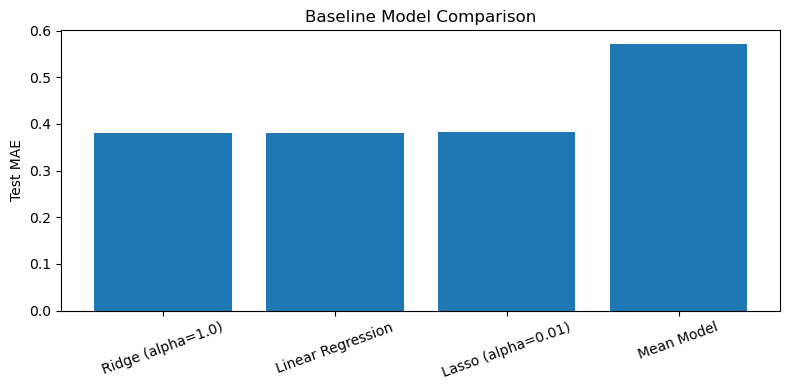

In [75]:
plt.figure(figsize=(8, 4))
plt.bar(results_df["model"], results_df["MAE_test"])
plt.ylabel("Test MAE")
plt.title("Baseline Model Comparison")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

The results show that the three models did better than the mean model, which is good. Ridge, Lasso and Linear regression are all pretty close to each other, so nothing really stands out yet. It at least means the questions do help predict grit score, but we probably need more feature work to see bigger differences. And then select them for the advanced model training.
